<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/Transformada_Inversa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las sig librerias:
import numpy as np  #Para el cálculo numérico
import matplotlib.pyplot as plt #Para la creación de gráficos y visualizaciones de datos
from scipy import stats #Para calcular media, mediana, desviación estándar, cuartiles, momentos de la distribución
import math #ayuda a organizar el código al encapsular las funciones matemáticas en un solo lugar


In [ ]:
# Parámetros de la distribución triangular
a = 1
b = 3
c = 5

In [ ]:
def triangular(u):
    """
    Función de distribución acumulada inversa para la distribución triangular.

    Parámetros:
    u: Valor entre 0 y 1 (probabilidad)

    Retorna:
    El valor x tal que F(x) = u

    Probabilidad en el punto b
    El punto f(b), con una distribución triangular con parámetros a, b y c (donde a ≤ b ≤ c),
    el valor F_b representa la probabilidad acumulada en el punto b, que es el
    punto donde cambia la forma de la función de distribución inversa.

         La función de densidad de probabilidad de una distribución triangular estándar es:

Para a ≤ x ≤ b: f(x) = 2(x-a)/((c-a)(b-a))
Para b < x ≤ c: f(x) = 2(c-x)/((c-a)(c-b))

Para obtener la función de distribución acumulada, integramos esta función de densidad:

Para a ≤ x ≤ b:
F(x) = ∫f(t)dt desde a hasta x
= ∫(2(t-a)/((c-a)(b-a)))dt
= (x-a)²/((c-a)(b-a))
Para b < x ≤ c:
F(x) = F(b) + ∫f(t)dt desde b hasta x
= F(b) + ∫(2(c-t)/((c-a)(c-b)))dt
= (b-a)²/((c-a)(b-a)) + [(c-b)² - (c-x)²]/((c-a)(c-b))
= (b-a)/(c-a) + [(c-b)² - (c-x)²]/((c-a)(c-b))
= (b-a)/(c-a) + [(c-x)²/((c-a)(c-b))]
= 1 - (c-x)²/((c-a)(c-b))

Y justo aquí vemos que F(b) = (b-a)/(c-a), que es exactamente nuestro F_b.

Entonces creamos un ciclo donde la funcion tome un valor para la primer parte de la funcion y otro para la segunda parte.

    """

    F_b = (b - a) / (c - a)

    if u <= F_b:
        # Primera parte de la función: a<=x<=b
        return a + math.sqrt(u * (c - a) * (b - a))
    else:
        # Segunda parte de la función: b<x<=c
        return c - math.sqrt((1 - u) * (c - a) * (c - b))



In [ ]:
# Función para calcular los valores teóricos
def valores_teoricos_triangular(a, b, c):
    #Calcula media y desviación estándar teóricas para una distribución triangular
    media = (a + b + c) / 3
    varianza = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18
    desv_std = math.sqrt(varianza)
    return media, desv_std

In [ ]:
# Generar números aleatorios utilizando el método de la transformada inversa
def generar_muestra_triangular(n):
    #Genera n muestras de una distribución triangular usando el método de la transformada inversa
    u = np.random.random(n)  # Generar n números aleatorios uniformes en [0,1]
    x = np.array([triangular_inverse_cdf(ui) for ui in u])
    return x

In [ ]:
# Tamaño de la muestra
n = 10000

In [ ]:
# Generar muestra
muestra = generar_muestra_triangular(n)

In [ ]:
# Calcular estadísticas de la muestra
media_muestral = np.mean(muestra)
desv_std_muestral = np.std(muestra)  #Desviación estándar muestral

In [ ]:
print(f"Media muestral: {media_muestral}")
print(f"Desviación estándar muestral: {desv_std_muestral}")

Media muestral: 3.0029357922465927
Desviación estándar muestral: 0.8208255959252176


In [ ]:
# Calcular valores teóricos
media_teorica, desv_std_teorica = valores_teoricos_triangular(a, b, c)

In [ ]:
print(f"Media teórica: {media_teorica}")
print(f"Desviación estándar teórica: {desv_std_teorica}")

Media teórica: 3.0
Desviación estándar teórica: 0.816496580927726


(array([0.03054624, 0.02290968, 0.0254552 , 0.03563728, 0.04327384,
        0.04327384, 0.07636561, 0.07127457, 0.10945737, 0.10945737,
        0.13745809, 0.11200289, 0.11709393, 0.11709393, 0.12218497,
        0.2010961 , 0.19091402, 0.1629133 , 0.17818642, 0.20618714,
        0.19855058, 0.20364162, 0.27491619, 0.21891474, 0.27491619,
        0.24946099, 0.28764379, 0.28000723, 0.30800795, 0.30800795,
        0.28764379, 0.33600868, 0.35637284, 0.3385542 , 0.34873628,
        0.39201012, 0.37164596, 0.29273483, 0.39964668, 0.48619437,
        0.45310261, 0.43019293, 0.37164596, 0.42764741, 0.46328469,
        0.45564813, 0.49128541, 0.48873989, 0.50910406, 0.50655853,
        0.40982876, 0.42001085, 0.45819365, 0.40982876, 0.41237428,
        0.46583021, 0.46837573, 0.43273845, 0.37164596, 0.38437356,
        0.33346316, 0.43273845, 0.39455564, 0.3512818 , 0.34364524,
        0.30546243, 0.33600868, 0.35382732, 0.3258266 , 0.29528035,
        0.29273483, 0.28764379, 0.26218859, 0.26

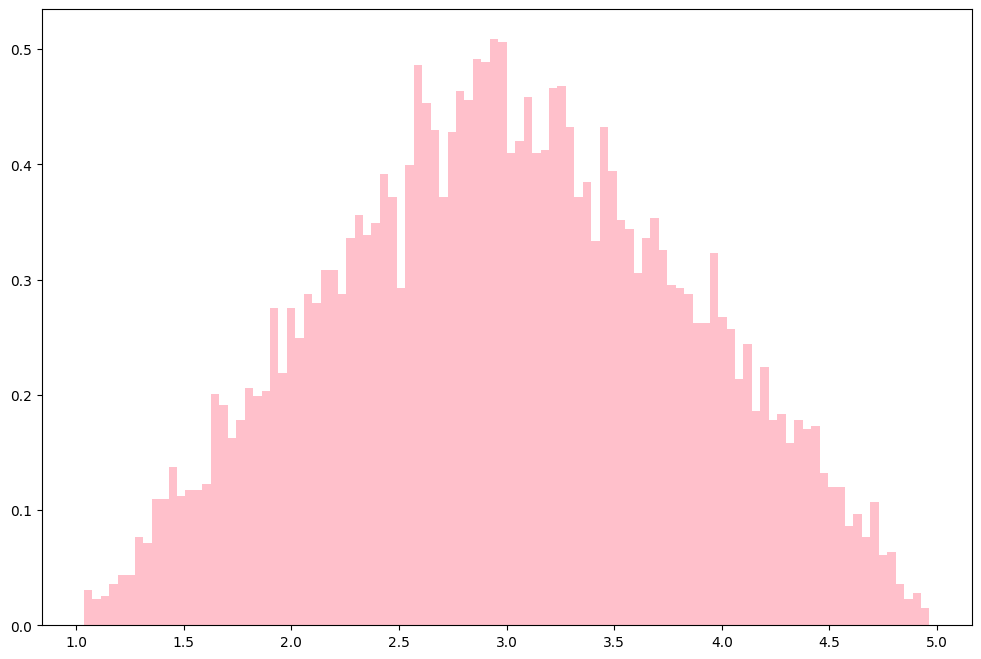

In [46]:
# Crear histograma
plt.figure(figsize=(12, 8)) #Crea una nueva figura con tamaño 12×8 pulgadas para mostrar la gráfica.
plt.hist(muestra, bins=100, density=True, color='pink', label='Histograma de la muestra')

#bins=100: Divide los datos en 50 contenedores o intervalos
#density=True: Normaliza el histograma para que el área bajo la curva sea 1, convirtiéndolo en una estimación de la densidad de probabilidad

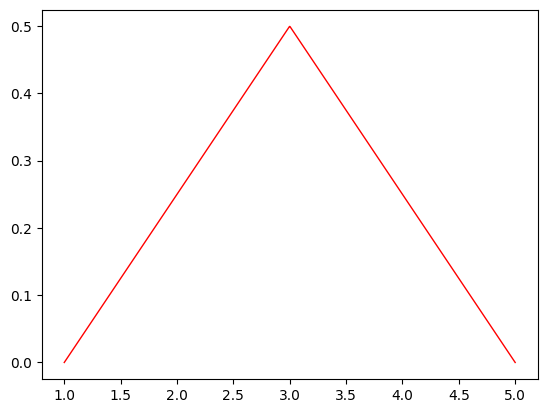

In [41]:
# Crear la función de densidad de probabilidad teórica para comparación
x = np.linspace(a, c, 1000) #Crea 1000 puntos equidistantes desde a=1 hasta c=5 para dibujar la curva teórica
y = stats.triang.pdf(x, (b-a)/(c-a), loc=a, scale=c-a)
""" Convertir parámetros a formato scipy
Calcula la función de densidad
Establece el límite inferior en 'a'
scale=c-a: Establece el rango total de la distribución
"""
plt.plot(x, y, 'r-', lw=1, label='PDF teórica')
#Dibuja la curva teórica con una línea roja continua de grosor 1

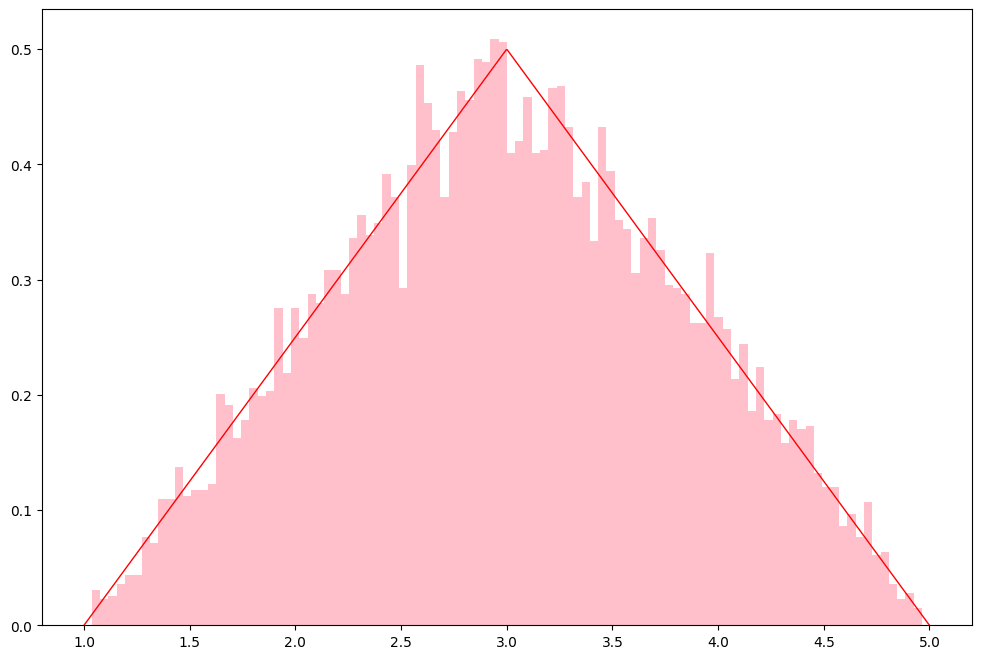

In [45]:
# Crear histograma
plt.figure(figsize=(12, 8)) #Crea una nueva figura con tamaño 12×8 pulgadas para mostrar la gráfica.
plt.hist(muestra, bins=100, density=True, color='pink', label='Histograma de la muestra')

# Crear la función de densidad de probabilidad teórica para comparación
x = np.linspace(a, c, 1000)
y = stats.triang.pdf(x, (b-a)/(c-a), loc=a, scale=c-a)  # Convertir parámetros a formato scipy
plt.plot(x, y, 'r-', lw=1, label='PDF teórica')

In [44]:
print("\nDiferencias:")
print(f"Diferencia en la media: {abs(media_muestral - media_teorica):.4f}")
print(f"Diferencia en la desviación estándar: {abs(desv_std_muestral - desv_std_teorica):.4f}")


Diferencias:
Diferencia en la media: 0.0029
Diferencia en la desviación estándar: 0.0043
